In [1]:
import joblib
import os
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import model_prep
from playsound import playsound

In [2]:
def load_data(dir_path):
    X_name, y_name = 'X.joblib', 'y.joblib'
    X = joblib.load(os.path.join(dir_path, X_name))
    y = joblib.load(os.path.join(dir_path, y_name))
    return X, y

In [3]:
def prepare_datasets(test_size, DATA_PATH, model = "CNN"):
    # load data
    X, y = load_data(DATA_PATH)
    print(X.shape)
    print(y.shape)

    # create train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    if model == "CNN":
        # add an axis to input sets
        X_train = X_train[..., np.newaxis]
        X_test = X_test[..., np.newaxis]

    return X_train, X_test, y_train, y_test

In [4]:
dir_path = "2D Scalograms"
test_size = 0.33
X_train, X_test, y_train, y_test = prepare_datasets(test_size = test_size, DATA_PATH = dir_path)

(5252, 127, 600)
(5252,)


(127, 600, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 598, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 299, 32)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 299, 32)       128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 297, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 149, 32)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 149, 32)       128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 14

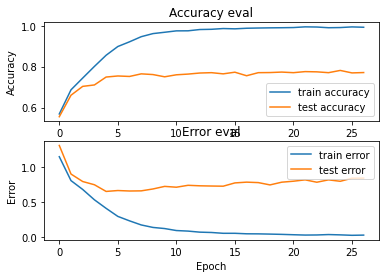

55/55 - 9s - loss: 0.8451 - accuracy: 0.7710


In [5]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
print(input_shape)

CNN_model = model_prep.build_CNN_model(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
CNN_model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

CNN_model.summary()

# train model
CNN_history = CNN_model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=27)

# plot accuracy/error for training and validation
model_prep.plot_history(CNN_history)

# evaluate model on test set
CNN_test_loss, CNN_test_acc = CNN_model.evaluate(X_test, y_test, verbose=2)
playsound("soundeffects/anime-wow-sound-effect.mp3")

In [6]:
CNN_model.save("models/2D_scalogram_model.h5")